In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('practice_addition_fnp2022-fincausal-task2.csv', sep = ';')

In [3]:
df

,Index,Text,Cause,Effect
0,0,The increase in net interest income was due pr...,a $152.9 billion increase in average outstandi...,The increase in net interest income
1,1,"NPAs increased $703 million year over year, pr...",PCI loans that would have been classified as n...,NPAs increased $703 million year over year
2,2,Additional increases in noninterest income wer...,higher insurance income driven by improved pro...,Additional increases in noninterest income
3,3,"During 2020, the Company also issued $6.5 bill...",The increase is due to net income in excess of...,"During 2020, the Company also issued $6.5 bill..."
4,4,The significant increases in earnings assets a...,"the Merger, as well as impacts from the COVID-...",The significant increases in earnings assets a...
...,...,...,...,...
533,533,We recorded a gain of $15.7 million for the ye...,the partial prepayment of the Wynn Macau Term ...,We recorded a $4.6 million loss on extinguishm...
534,534,We recorded a loss of $13.1 million and $3.2 m...,change in the fair value of an interest rate c...,We recorded a loss of $13.1 million and $3.2 m...
535,535,We recorded a $4.6 million loss on extinguishm...,the partial prepayment of the Wynn Macau Term ...,We recorded a $4.6 million loss on extinguishm...
536,536,"Accordingly, operating cash flows will be impa...","During the year ended December 31, 2020, the d...","Accordingly, operating cash flows will be impa..."


In [4]:
df.at[:,'Label'] = 'causal'

In [5]:
df

,Index,Text,Cause,Effect,Label
0,0,The increase in net interest income was due pr...,a $152.9 billion increase in average outstandi...,The increase in net interest income,causal
1,1,"NPAs increased $703 million year over year, pr...",PCI loans that would have been classified as n...,NPAs increased $703 million year over year,causal
2,2,Additional increases in noninterest income wer...,higher insurance income driven by improved pro...,Additional increases in noninterest income,causal
3,3,"During 2020, the Company also issued $6.5 bill...",The increase is due to net income in excess of...,"During 2020, the Company also issued $6.5 bill...",causal
4,4,The significant increases in earnings assets a...,"the Merger, as well as impacts from the COVID-...",The significant increases in earnings assets a...,causal
...,...,...,...,...,...
533,533,We recorded a gain of $15.7 million for the ye...,the partial prepayment of the Wynn Macau Term ...,We recorded a $4.6 million loss on extinguishm...,causal
534,534,We recorded a loss of $13.1 million and $3.2 m...,change in the fair value of an interest rate c...,We recorded a loss of $13.1 million and $3.2 m...,causal
535,535,We recorded a $4.6 million loss on extinguishm...,the partial prepayment of the Wynn Macau Term ...,We recorded a $4.6 million loss on extinguishm...,causal
536,536,"Accordingly, operating cash flows will be impa...","During the year ended December 31, 2020, the d...","Accordingly, operating cash flows will be impa...",causal


In [6]:
s = set(df[' Cause'].to_list() + df[' Effect'].to_list())


In [7]:
len(s)

860

In [8]:
import random as r
r.seed(81)
for i in range(135):
    index_one = r.randint(1,537)
    index_two = r.randint(1,537)
    df = pd.concat([df,pd.DataFrame([['-','-',df.loc[index_one][' Cause'],df.loc[index_two][' Cause'],'non_causal']], columns=df.columns)])

for i in range(135):
    index_one = r.randint(1,537)
    index_two = r.randint(1,537)
    df = pd.concat([df,pd.DataFrame([['-','-',df.loc[index_one][' Cause'],df.loc[index_two][' Effect'],'non_causal']], columns=df.columns)])

for i in range(135):
    index_one = r.randint(1,537)
    index_two = r.randint(1,537)
    df = pd.concat([df,pd.DataFrame([['-','-',df.loc[index_one][' Effect'],df.loc[index_two][' Effect'],'non_causal']], columns=df.columns)])

for i in range(135):
    index_one = r.randint(1,537)
    index_two = r.randint(1,537)
    df = pd.concat([df,pd.DataFrame([['-','-',df.loc[index_one][' Effect'],df.loc[index_two][' Cause'],'non_causal']], columns=df.columns)])
    

In [9]:
df = df.drop(columns=['Index'])

In [10]:
df = df.reset_index(drop=True)

In [11]:
df.to_csv('FinCausal.csv', index=False)

In [12]:
df

,Text,Cause,Effect,Label
0,The increase in net interest income was due pr...,a $152.9 billion increase in average outstandi...,The increase in net interest income,causal
1,"NPAs increased $703 million year over year, pr...",PCI loans that would have been classified as n...,NPAs increased $703 million year over year,causal
2,Additional increases in noninterest income wer...,higher insurance income driven by improved pro...,Additional increases in noninterest income,causal
3,"During 2020, the Company also issued $6.5 bill...",The increase is due to net income in excess of...,"During 2020, the Company also issued $6.5 bill...",causal
4,The significant increases in earnings assets a...,"the Merger, as well as impacts from the COVID-...",The significant increases in earnings assets a...,causal
...,...,...,...,...
1073,-,Interest expense was $15.8 million and $20.7 m...,the $159 million environmental remediation cha...,non_causal
1074,-,The decrease in net income (loss) attributable...,lost distribution in certain product categorie...,non_causal
1075,-,"In constant currency, SG&A costs as a percenta...",Project Renewal and the European Transformatio...,non_causal
1076,-,The yield on the total loan portfolio for the ...,the Merger and growth in commercial and indust...,non_causal


In [1]:
import json

def read_jsonl(file_name):
    records = []
    with open(file_name, "r") as r:
        for line in r:
            record = json.loads(line)
            records.append(record)
    return records

In [3]:
import pandas as pd
en_train_records = read_jsonl("Headlines/en/simple/train.jsonl")
en_val_records = read_jsonl("Headlines/en/simple/val.jsonl")
en_test_records = read_jsonl("Headlines/en/simple/test.jsonl")
en_records = en_train_records + en_val_records + en_test_records
df = pd.DataFrame(en_records)

In [5]:
df

,full_result,full_agreement,full_ds_result,full_ds_confidence,simple_result,simple_agreement,simple_ds_result,simple_ds_confidence,left_title,right_title,left_url,right_url,left_timestamp,right_timestamp,id,has_link,label
0,left_right_cause,0.7,left_right_cause,0.999951,left_right,0.7,left_right,0.999806,Indian government brushes off Indian tax offic...,Inquiry against 50 IRS officers over suggestin...,https://www.moneycontrol.com/news/business/eco...,https://www.moneycontrol.com/news/business/eco...,1587934800,1587934800,en_tg_1659,1,1
1,right_left_cause,0.8,right_left_cause,0.999998,right_left,0.8,right_left,0.999998,Insensitive or lost in translation? Twitter we...,Coronavirus: Why should I give money to lower-...,https://scroll.in/field/960310/insensitive-or-...,https://scroll.in/field/960307/coronavirus-why...,1587962640,1587946740,en_tg_1144,1,2
2,bad,0.8,bad,0.999995,not_cause,1.0,not_cause,0.999966,Why Reliance Industries share price has gained...,IndusInd Bank stock rises over 6% ahead of Q4 ...,https://www.businesstoday.in/markets/company-s...,https://www.businesstoday.in/markets/company-s...,1587965880,1587954720,en_tg_976,1,0
3,rel,0.8,rel,0.999951,not_cause,1.0,not_cause,0.999945,Meizu 17 teaser poster confirms 64MP Sony IMX6...,Meizu 17 Pro has Super wireless mCharge support,https://www.gizmochina.com/2020/04/27/meizu-17...,https://www.gizmochina.com/2020/04/27/meizu-17...,1587956479,1587968663,en_tg_878,1,0
4,bad,0.9,bad,1.000000,not_cause,1.0,not_cause,0.999991,10 things you need to know before the opening ...,'One of the most ridiculous deals that I've ev...,https://markets.businessinsider.com/news/stock...,https://markets.businessinsider.com/news/stock...,1587971880,1587955500,en_tg_519,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,left_right_cause,0.6,left_right_cause,0.999990,left_right,0.7,left_right,0.999998,"Visa, OCI card suspension prevents several Ind...",Indian govt will soon take decision on OCI vis...,https://www.thehindu.com/news/national/visa-oc...,https://www.thehindu.com/news/national/indian-...,1589238945,1589747280,en_tg_2638,1,1
5412,rel,0.6,rel,1.000000,not_cause,0.8,not_cause,0.999996,Michael Jordan game-worn sneakers sell for rec...,"Jazz tried to troll Michael Jordan, Bulls with...",https://www.foxnews.com/sports/michael-jordan-...,https://www.foxnews.com/sports/utah-jazz-micha...,1589737326,1589748551,en_tg_3190,1,0
5413,right_left_cause,0.7,right_left_cause,0.999983,right_left,0.7,right_left,0.999774,Some local churches resume indoor services aft...,Judge issues order to allow indoor worship in ...,https://www.wbtv.com/2020/05/17/some-local-chu...,https://www.wbtv.com/2020/05/16/judge-issues-o...,1589748594,1589646430,en_tg_1397,1,2
5414,same,0.5,same,0.999312,not_cause,0.8,not_cause,0.999956,House passes $3 trillion coronavirus relief bi...,House Democrats vote to pass new relief packag...,https://www.businessinsider.com/house-passes-c...,https://www.businessinsider.com/personal-finan...,1589581790,1589802780,en_tg_5307,1,0


<Axes: >

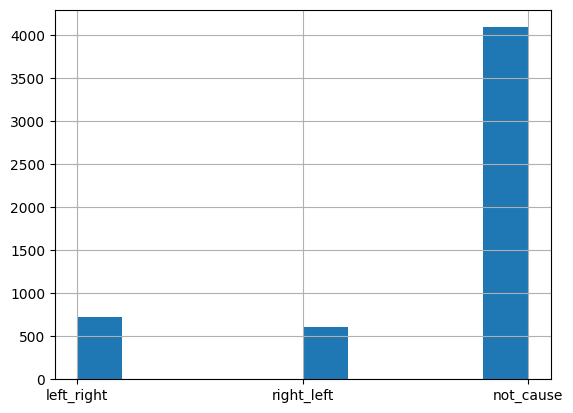

In [6]:
df.simple_result.hist()

In [7]:
df.to_csv('Headlines.csv')